## Rastringin 2D Algoritmo Evolutivo

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pygad
from matplotlib import cm


In [13]:
def rastrigin_2d(x):
    A = 10
    n = len(x)
    return A * n + sum([(x[i]**2 - A * np.cos(2 * np.pi * x[i])) for i in range(n)])
def rastring_2D(x, y):
    fx=20 + x**2 - 10*np.cos(2*x*np.pi) + y**2 - 10*np.cos(2*y*np.pi)
    return fx
def fitness_func(solution, solution_idx):
    fitness = 1.0 / (rastrigin_2d(solution) + 1e-8)
    return fitness

# Definir los límites del espacio de búsqueda
search_space = np.array([[-5.12, 5.12]] * 2)

num_generations = 10
num_parents_mating = 4

sol_per_pop = 8
num_genes = 2

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10


# Configuración del algoritmo genético
ga_instance_2d = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)


ga_instance_2d.run()
soluciones_rosenbrock = ga_instance_2d.solutions
soluciones_rosenbrock=np.array(soluciones_rosenbrock)
x_min=ga_instance_2d.best_solution()


punto optimo:  [ 0.02276685 -0.0914031 ]
valor optimo:  0.5829887293298547


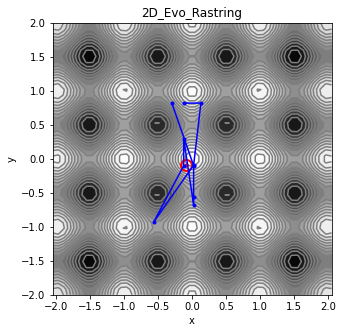

In [18]:
def plot_contour():

    X = np.linspace(start=-2.048, stop=2.048, num=50)
    Y = np.linspace(start=-2, stop=2, num=50)
    X, Y = np.meshgrid(X, Y)
    Z = rastring_2D(X, Y)

    plt.subplots(figsize=(5, 5))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(x_min[0][1],x_min[0][1], "o", color="red", fillstyle="none", markersize=11, markeredgewidth=2)
    plt.plot(x_min[0][1],x_min[0][1], ".", color="red")
    plt.title("2D_Evo_Rastring")
    plt.xlabel("x")
    plt.ylabel("y")
print("punto optimo: ",x_min[0])
print("valor optimo: ",x_min[1])
d=len(soluciones_rosenbrock)-10
plot_contour()
plt.plot(soluciones_rosenbrock[d:,0],soluciones_rosenbrock[d:,1], ".-", color="b")
plt.show()

## Rastrigin 3D Algoritmo evolutivo

Mejor solución encontrada:  [-3406.66311433 -3073.54780406  3351.37851544]
Fitness de la mejor solución:  32283839.601949047


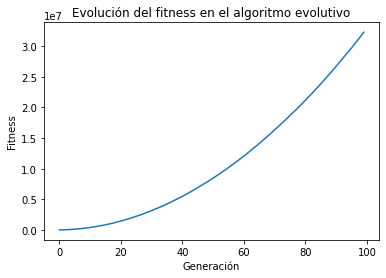

In [4]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# Función Rastrigin en 3 dimensiones
def rastrigin(solution, solution_idx):
    A = 10
    value = A * 3 + np.sum(solution**2 - A * np.cos(2 * np.pi * solution))
    return value

# Crea la población inicial
num_generations = 100
num_parents_mating = 50
sol_per_pop = 100
num_genes = 3

init_range_low = -5.12
init_range_high = 5.12

parent_selection_type = "sss"
keep_parents = -1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       fitness_func=rastrigin)

# Inicia la evolución
fitness_progress = []
for generation in range(ga_instance.num_generations):
    ga_instance.run()
    fitness_progress.append(ga_instance.best_solution()[1])

    # Imprime el mejor fitness de la generación
    #print("Generación: ", generation + 1, " Mejor fitness: ", ga_instance.best_solution()[1])

# Imprime la mejor solución encontrada
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución encontrada: ", solution)
print("Fitness de la mejor solución: ", solution_fitness)

# Grafica la evolución del fitness
plt.plot(fitness_progress)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.title('Evolución del fitness en el algoritmo evolutivo')
plt.show()
